In [1]:
import scipy as sp
from scipy import sparse
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Define the matrix A for the linear system Au = b

In [2]:
def A_matrix(n):
    L=(2*sparse.eye(n-1).toarray()-sparse.eye(n-1,n-1,1).toarray()-sparse.eye(n-1,n-1,-1).toarray())*n**2
    A=sparse.kron(L,sparse.eye(n-1)).toarray()+sparse.kron(sparse.eye(n-1),L)
    return A

### Use Jacobi iteration to approximate solutions

In [3]:
def jacobi_iteration(A,u_0,b,eps):            #b,u0 should not necessarily be of type numpy.array, they can just be lists i.e. b = [1,1,1]
    D = np.diag(np.diagonal(A))               #Creates D 
    D_inv = np.matrix(np.linalg.inv(D))       #Inverse of D
    
    u_k = u_0
    u_k1 = u_k + np.array(np.matmul(D_inv, np.array(b - np.matmul(A,u_k))[0]))[0] #Me need to convert between a matrices to arrays
    
    while np.linalg.norm(u_k1 - u_k) >= eps:
        u_k = u_k1
        u_k1 = u_k + np.array(np.matmul(D_inv, np.array(b - np.matmul(A,u_k))[0]))[0]
        
    return u_k1

### Some tests

In [4]:
def test(n, eps = 1e-10):
    x=np.linspace(0,1,n+1)   #We have n-1 inner points
    y=np.linspace(0,1,n+1)   
    x = x[1:n]               #We just want inner points of the grid
    y = y[1:n]
    xx, yy = np.meshgrid(x,y,sparse=True)
    b=5*np.pi**2*np.sin(2*np.pi*xx)*np.sin(np.pi*yy) #f(i,j)
    b = b.flatten()
    u_0 = np.zeros(len(b))
    
    return np.linalg.norm(np.linalg.solve(A_matrix(n),b) - jacobi_iteration(A_matrix(n),u_0,b,eps)) 

    #returns ||real solution - approximate solution||_{2} 

In [5]:
test(16) #It's more accurate when the matrix A is low dimensional

1.990927062690977e-09

### Plotting

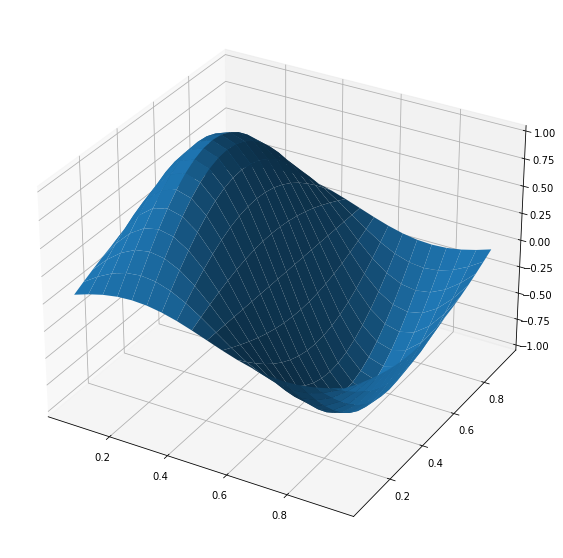

In [6]:
n = 20
eps = 1e-10

x = np.linspace(0,1,n+1)   #We have n-1 inner points
y = np.linspace(0,1,n+1)   
x = x[1:n]               #We just want inner points of the grid
y = y[1:n]
xx, yy = np.meshgrid(x,y,sparse=True)
b = 5*np.pi**2*np.sin(2*np.pi*xx)*np.sin(np.pi*yy)
b = b.flatten()
u_0 = np.zeros(len(b))
u = jacobi_iteration(A_matrix(n),u_0,b,eps)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
z = u.reshape(xx.size,yy.size) 
ax.plot_surface(xx,yy,z)
               
plt.show()

### Compute the maximum norm between the approximate solution and the real solution

In [7]:
def max_norm(n, eps = 1e-10):
    x = np.linspace(0,1,n+1)   #We have n-1 inner points
    y = np.linspace(0,1,n+1)   
    x = x[1:n]               #We just want inner points of the grid
    y = y[1:n]
    xx, yy = np.meshgrid(x,y,sparse=True)

    u = np.sin(2*np.pi*xx)*np.sin(np.pi*yy) #Real solutions of u(i,j)
    u = u.flatten()

    b=5*np.pi**2*np.sin(2*np.pi*xx)*np.sin(np.pi*yy) #f(i,j)
    b = b.flatten()

    u_0 = np.zeros(len(u))


    return np.linalg.norm(np.subtract(u, jacobi_iteration(A_matrix(n),u_0,b,eps)), np.inf) #u is not an np.array so we can't subtract them, we need np.subtract()

    #returns max|u(i,j) - jacobian iteration u(i,j)|

In [8]:
max_norm(10)

0.027008849047248873

In [9]:
max_norm(20)

0.007017931168530556

### LogLog plot to observe a convergence rate of $O(h^{-2})$

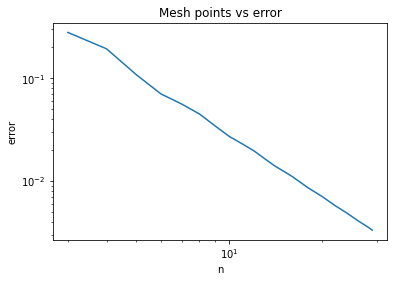

In [10]:
N = []
E = []
for n in range(3,30):
    N.append(n)
    E.append(max_norm(n, eps = 1e-10))

plt.title('Mesh points vs error')
plt.xlabel("n")
plt.ylabel("error")
plt.loglog(N,E)